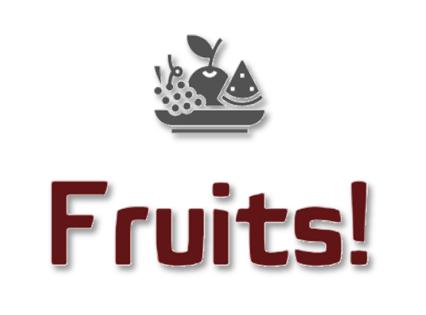

In [1]:
from pyquickhelper.helpgen import NbImage
NbImage("fruits.png")

# <span class="bg-primary">Déployer un modèle dans le cloud <span> 🚀
    
# <span class="bg-primary">Partie 1 : LOCAL<span> 

# <span class="bg-danger">Sommaire<span> 

In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

# <span class="bg-danger">Sources<span> 

__Guide de l'utilsateur Pyspark 3.1.1__ https://spark.apache.org/docs/latest/

__Tutoriels pyspark :__ 
- https://towardsdatascience.com/beginners-guide-to-pyspark-bbe3b553b79f
- https://towardsdatascience.com/the-most-complete-guide-to-pyspark-dataframes-2702c343b2e8
- http://www.xavierdupre.fr/app/sparkouille/helpsphinx/lectures/index_spark.html
- https://docs.databricks.com/_static/notebooks/deep-learning/deep-learning-transfer-learning-keras.html

# <span class="bg-danger">Importations<span> 

__Environnement  : Windows 10__
- [x] Java :"1.8.0_282"
- [x] Python : "3.7.0"
- [x] Pyspark : "3.1.1"
- [x] Spark pré-construit pour Apache Hadoop 2.7

In [3]:
# Librairies classiques
import pandas as pd
import numpy as np
import sys
import os
import io
import time
# Lecture d'images
from PIL import Image

__Spark__ est un __système de traitement rapide et parallèle__. 
- [x] Il fournit des APIs de haut niveau en Java, Scala, Python et R, et un moteur optimisé qui supporte l'exécution des graphes. 
- [x] Il supporte également un ensemble d'outils de haut niveau tels que:
- __Spark SQL__ pour le support du traitement de données structurées, 
- __MLlib__ pour l'apprentissage des données, 
- __GraphX__ pour le traitement des graphes
- __Spark Streaming__ pour le traitment des données en streaming.
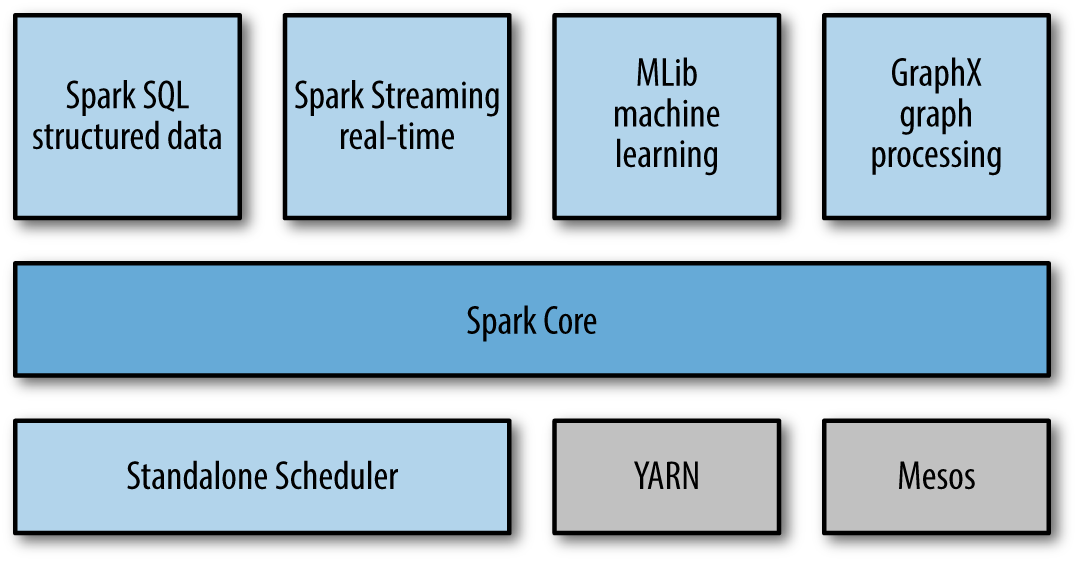

In [4]:
# Pyspark
import findspark
findspark.init()
import pyspark
pyspark.__version__

'3.1.1'

## <span class="bg-info">1. Création d'une SparkSession - Configuration - Spark UI<span> 

__SparkSession__ : point d'entrée de Pyspark
- [x] __builder()__ générateur pour créer la session
- [x] __getOrCreate()__ retourne une SparkSession déjà existante; sinon crée une nouvelle SparkSession
- [x] __master()__ nom de maître comme argument (yarn, mesos, ou local[x] avec x>0, entier. Idéalement: x = nombres de coeurs de processeur, c'est nombre de partitions qu'il doit créer lors de l'utilisation de RDD, DataFrame et Dataset.
- [x] __appName()__ méthode utilisée pour nommer l'application

In [5]:
from pyspark.sql import SparkSession, Row
from pyspark.sql.types import *

In [6]:
spark = SparkSession.builder\
        .master("local[*]")\
        .appName('P8_1')\
        .getOrCreate()

# où le '*' représente tous les cœurs du CPU.

__Configuration__
- [x] __spark.sql.repl.eagerEval.enabled__ : activer la configuration pour l'évaluation rapide de PySpark DataFrame dans des blocs-notes tels que Jupyter. 
- [x] __spark.sql.repl.eagerEval.maxNumRows__ :contrôler le nombre de lignes à afficher 
- [x] __spark.sql.execution.arrow.pyspark.enabled__ : Arrow est disponible en tant qu'optimisation lors de la conversion d'un Spark DataFrame en Pandas DataFrame à l'aide de l'appel toPandas()et lors de la création d'un Spark DataFrame à partir d'un Pandas DataFrame avec createDataFrame(pandas_df). Pour utiliser Arrow lors de l'exécution de ces appels, les utilisateurs doivent d'abord définir la configuration Spark «spark.sql.execution.arrow.enabled» sur «true». Ceci est désactivé par défaut.

In [7]:
import pyarrow
pyarrow.__version__

'1.0.0'

In [8]:
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)

In [9]:
spark.conf.set('spark.sql.repl.eagerEval.maxNumRows', 5)

In [10]:
spark.conf.set('spark.sql.execution.arrow.pyspark.enabled', True)

__Interface WEB__
- [x] __interface utilisateur Web__ : par défaut sur le port 4040, affiche des informations utiles sur l'application
- [x] __Une liste__ des étapes et des tâches du planificateur
- [x] __Un résumé__ des tailles RDD et de l'utilisation de la mémoire
- [x] __Informations environnementales__
- [x] __Informations sur les exécuteurs__

http://localhost:4040

In [11]:
# Ouverture de l'interface utilisateur web
spark

## <span class="bg-info">2. Chargement des données<span> 

__Note__ : 
- [x] __en local__, nous n'utiliserons qu'un échantillon d'images de notre jeu d'entraînement. Cela nous permettra d'expérimenter en limitant les claculs et donc les temps de calculs.
- [x] __nom des dossiers__ : les espaces vides contenus dans les noms de dossiers ont été supprimés afin d'éviter des erreurs lors du chargement.

### <span class="bg-warning">2.1 Chemin vers les images<span> 

In [12]:
# Path vers les images (local)
img_path = 'D:/train_Classification_12/*'

### <span class="bg-warning">2.2 Lecture et chargement des images<span> 

__En format image__ :

- [x] __inferSchema__ :La valeur par défaut de cette option est False. Si elle est réglée sur true, elle déduit automatiquement les types de colonnes en fonction des données. 

__En format "binaryFile"__

- [x] __binaryFile__ :On charge les images en utilisant la source de données de fichiers binaires de Spark. On peut également utiliser la source de données d'images de Spark, mais la source de données de fichiers en format binaires offre plus de souplesse dans la façon de prétraiter les images.
   - __path (StringType)__ :Le chemin d'accès du fichier
   - __modificationTime (TimestampType)__ :L'heure de modification du fichier
   - __length (LongType)__ :La longueur du fichier en octets
   - __content (BinaryType)__ :Le contenu du fichier
   
#### <span class="text-info">Nous conserverons pour la suite le format "binaryFile" pour faciliter le preprocessing<span> 

#### <span class="text-danger">En format "image"<span> 

In [13]:
#En format "image"
df_images = spark.read.format('image').load(img_path, inferschema=True) 

In [14]:
# Nombre d'images dans l'échantillon
df_images.count()

5868

In [15]:
# Visualisation
df_images.show()

+--------------------+
|               image|
+--------------------+
|{file:///D:/train...|
|{file:///D:/train...|
|{file:///D:/train...|
|{file:///D:/train...|
|{file:///D:/train...|
|{file:///D:/train...|
|{file:///D:/train...|
|{file:///D:/train...|
|{file:///D:/train...|
|{file:///D:/train...|
|{file:///D:/train...|
|{file:///D:/train...|
|{file:///D:/train...|
|{file:///D:/train...|
|{file:///D:/train...|
|{file:///D:/train...|
|{file:///D:/train...|
|{file:///D:/train...|
|{file:///D:/train...|
|{file:///D:/train...|
+--------------------+
only showing top 20 rows



- [x] __printSchema__ : Imprime le schéma dans le format de l'arbre.

In [16]:
# Schéma du dataframe
df_images.printSchema()

root
 |-- image: struct (nullable = true)
 |    |-- origin: string (nullable = true)
 |    |-- height: integer (nullable = true)
 |    |-- width: integer (nullable = true)
 |    |-- nChannels: integer (nullable = true)
 |    |-- mode: integer (nullable = true)
 |    |-- data: binary (nullable = true)



- [x] __show(n, truncate, vertical)__ : Imprime les premières n lignes sur la console.
- __n__ : (fac) nombres de lignes à afficher
- __truncate__ : (fac) Si défini sur True, tronque les chaînes de plus de 20 caractères par défaut.
- __vertical__ : (fac) Si défini sur True, imprime les lignes de sortie verticalement (une ligne par valeur de colonne)

In [17]:
df_images.select('image.origin').show(1, False)

+----------------------------------------------------------+
|origin                                                    |
+----------------------------------------------------------+
|file:///D:/train_Classification_12/Watermelon/r_46_100.jpg|
+----------------------------------------------------------+
only showing top 1 row



In [18]:
df_images.select('image.height', 'image.width', 'image.nChannels').show(1, False)

+------+-----+---------+
|height|width|nChannels|
+------+-----+---------+
|100   |100  |3        |
+------+-----+---------+
only showing top 1 row



In [19]:
df_images.select('image.mode').show(1, False)

+----+
|mode|
+----+
|16  |
+----+
only showing top 1 row



Une image par ligne

#### <span class="text-danger">En format "binaryFile"<span> 

In [20]:
# En format "binaryFile"
df_binary = spark.read.format("binaryFile") \
  .option("pathGlobFilter", "*.jpg") \
  .option("recursiveFileLookup", "true") \
  .load(img_path)

In [21]:
# Nombre d'images dans l'échantillon
df_binary.count()

5868

In [22]:
# Visualisation
df_binary.show()

+--------------------+--------------------+------+--------------------+
|                path|    modificationTime|length|             content|
+--------------------+--------------------+------+--------------------+
|file:/D:/train_Cl...|2021-04-08 11:28:...|  6989|[FF D8 FF E0 00 1...|
|file:/D:/train_Cl...|2021-04-08 11:28:...|  6987|[FF D8 FF E0 00 1...|
|file:/D:/train_Cl...|2021-04-08 11:28:...|  6984|[FF D8 FF E0 00 1...|
|file:/D:/train_Cl...|2021-04-08 11:28:...|  6982|[FF D8 FF E0 00 1...|
|file:/D:/train_Cl...|2021-04-08 11:28:...|  6973|[FF D8 FF E0 00 1...|
|file:/D:/train_Cl...|2021-04-08 11:28:...|  6958|[FF D8 FF E0 00 1...|
|file:/D:/train_Cl...|2021-04-08 11:28:...|  6956|[FF D8 FF E0 00 1...|
|file:/D:/train_Cl...|2021-04-08 11:28:...|  6956|[FF D8 FF E0 00 1...|
|file:/D:/train_Cl...|2021-04-08 11:28:...|  6945|[FF D8 FF E0 00 1...|
|file:/D:/train_Cl...|2021-04-08 11:28:...|  6934|[FF D8 FF E0 00 1...|
|file:/D:/train_Cl...|2021-04-08 11:28:...|  6933|[FF D8 FF E0 0

- [x] __printSchema__ : Imprime le schéma dans le format de l'arbre.

In [23]:
# Schéma du dataframe
df_binary.printSchema()

root
 |-- path: string (nullable = true)
 |-- modificationTime: timestamp (nullable = true)
 |-- length: long (nullable = true)
 |-- content: binary (nullable = true)



### <span class="bg-warning">2.3 Extraction de la catégorie des images<span> 

#### <span class="text-danger">En format "image"<span> 

- [x] __element_at(col, extraction)__ : Fonction de collection: renvoie l'élément de l'array à l'index donné lors de l'extraction si col est un array. 
  - __col__ : nom de la colonne contenant l'array ( df[image.origin])
  - __extraction__ : index à vérifier dans le tableau (ici -2 :"home/chris/Notebooks/img_samples/ Apple_Braeburn /2_100", nom de classe en avant dernière position)

In [24]:
from pyspark.sql.functions import element_at, split
# On extraie la classe de chaque image de fruit
df_images = df_images.withColumn('classe', element_at(split(df_images['image.origin'], "/"), -2))

In [25]:
df_images.show()

+--------------------+----------+
|               image|    classe|
+--------------------+----------+
|{file:///D:/train...|Watermelon|
|{file:///D:/train...|Watermelon|
|{file:///D:/train...|Watermelon|
|{file:///D:/train...|Watermelon|
|{file:///D:/train...|Watermelon|
|{file:///D:/train...|Watermelon|
|{file:///D:/train...|Watermelon|
|{file:///D:/train...|Watermelon|
|{file:///D:/train...|Watermelon|
|{file:///D:/train...|Watermelon|
|{file:///D:/train...|Watermelon|
|{file:///D:/train...|Watermelon|
|{file:///D:/train...|Watermelon|
|{file:///D:/train...|Watermelon|
|{file:///D:/train...|Watermelon|
|{file:///D:/train...|Watermelon|
|{file:///D:/train...|Watermelon|
|{file:///D:/train...|Watermelon|
|{file:///D:/train...|Watermelon|
|{file:///D:/train...|Watermelon|
+--------------------+----------+
only showing top 20 rows



#### <span class="text-danger">En format "binaryFile"<span> 

In [26]:
from pyspark.sql.functions import element_at, split
# On extraie la classe de chaque image de fruit
df_binary = df_binary.withColumn('classe', element_at(split(df_binary['path'], "/"), -2))

In [27]:
df_binary.show()

+--------------------+--------------------+------+--------------------+----------+
|                path|    modificationTime|length|             content|    classe|
+--------------------+--------------------+------+--------------------+----------+
|file:/D:/train_Cl...|2021-04-08 11:28:...|  6989|[FF D8 FF E0 00 1...|Watermelon|
|file:/D:/train_Cl...|2021-04-08 11:28:...|  6987|[FF D8 FF E0 00 1...|Watermelon|
|file:/D:/train_Cl...|2021-04-08 11:28:...|  6984|[FF D8 FF E0 00 1...|Watermelon|
|file:/D:/train_Cl...|2021-04-08 11:28:...|  6982|[FF D8 FF E0 00 1...|Watermelon|
|file:/D:/train_Cl...|2021-04-08 11:28:...|  6973|[FF D8 FF E0 00 1...|Watermelon|
|file:/D:/train_Cl...|2021-04-08 11:28:...|  6958|[FF D8 FF E0 00 1...|Watermelon|
|file:/D:/train_Cl...|2021-04-08 11:28:...|  6956|[FF D8 FF E0 00 1...|Watermelon|
|file:/D:/train_Cl...|2021-04-08 11:28:...|  6956|[FF D8 FF E0 00 1...|Watermelon|
|file:/D:/train_Cl...|2021-04-08 11:28:...|  6945|[FF D8 FF E0 00 1...|Watermelon|
|fil

## <span class="bg-info">3. Réduction de dimensions des données<span> 

### <span class="bg-warning">3.1 Préparation du modèle <span> 

Nous utilisons le CNN __"Xception"__ de la librairie Keras.

La dernière couche (celle où a lieu la classification) __est tronquée__. 

In [28]:
# core featurizer
import tensorflow as tf
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
tf.__version__

'2.4.1'

In [29]:
model = Xception(
        include_top=False, # top layer supprimé
        weights=None,
        input_shape=(100,100,3),
        pooling='max'
)

In [30]:
model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 49, 49, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 49, 49, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 49, 49, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

### <span class="bg-warning">3.2 Fonctions utiles <span> 

https://docs.databricks.com/_static/notebooks/deep-learning/deep-learning-transfer-learning-keras.html

__Les workers Spark__ doivent accéder au modèle et à __ses poids__.

Pour les modèles de taille modérée (< 1 Go), une bonne pratique consiste à télécharger le modèle vers __le driver Spark__, puis à diffuser les poids aux workers. 

In [31]:
bc_model_weights = spark.sparkContext.broadcast(model.get_weights())

In [32]:
# https://docs.databricks.com/_static/notebooks/deep-learning/deep-learning-transfer-learning-keras.html
def model_fn():
    """
    Returns a Xception model with top layer 
    removed and broadcasted pretrained weights.
    """
    model = Xception(
                    include_top=False, # top layer supprimé
                    weights=None,
                    pooling='max')
    model.set_weights(bc_model_weights.value)
    return model

- [x] __Xception__ : https://keras.io/api/applications/xception/
  - __include_top__ : False : couche fully_connect non connectée au sommet du réseau de neuronnes
  - __input_shape__ : tuple de forme optionnel, à spécifier uniquement si include_top est False (sinon la forme de l'entrée doit être (299, 299, 3). Elle doit avoir exactement 3 canaux d'entrée, et la largeur et la hauteur ne doivent pas être inférieures à 71. Par exemple, (150, 150, 3) serait une valeur valide.
  - __weights__ : None (random initialization)

In [33]:
import PIL
from PIL import Image

In [34]:
def preprocess(content):
    """
    Preprocesses raw image bytes for prediction.
    """
    # lecture + redimension (299x299) pour Xception
    img = PIL.Image.open(io.BytesIO(content)).resize([299, 299])
    arr = img_to_array(img) # image en array
    return preprocess_input(arr)

def featurize_series(model, content_series):
    """
    Featurize a pd.Series of raw images using the input model.
    :return: a pd.Series of image features
    """
    input = np.stack(content_series.map(preprocess))
    preds = model.predict(input)
    # For some layers, output features will be multi-dimensional tensors.
    # We flatten the feature tensors to vectors for easier storage in Spark DataFrames.
    output = [p.flatten() for p in preds]
    return pd.Series(output)

In [35]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

- [x] __udf(f, returnType)__ : Crée une fonction définie par l'utilisateur ( UDF )
  - __f__ : fonction python
  - __returnType__ : type de retour (pyspark.sql.types.DataType ou str)

In [36]:
from pyspark.sql.functions import col, pandas_udf, PandasUDFType

In [37]:
@pandas_udf('array<float>', PandasUDFType.SCALAR_ITER)
def featurize_udf(content_series_iter):
    '''
    This method is a Scalar Iterator pandas UDF wrapping our featurization function.
    The decorator specifies that this returns a Spark DataFrame column of type ArrayType(FloatType).
  
    :param content_series_iter: This argument is an iterator over batches of data, where each batch
                              is a pandas Series of image data.
    '''
    # With Scalar Iterator pandas UDFs, we can load the model once and then re-use it
    # for multiple data batches.  This amortizes the overhead of loading big models.
    model = model_fn()
    for content_series in content_series_iter:
        yield featurize_series(model, content_series)

C:\Spark\spark-3.1.1-bin-hadoop2.7\python\pyspark\sql\pandas\functions.py:389: UserWarning: In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecated in the future releases. See SPARK-28264 for more details.
  warnings.warn(


### <span class="bg-warning">3.3 Extraction des features <span> 

In [38]:
# Pandas UDFs on large records (e.g., very large images) can run into Out Of Memory (OOM) errors.
# If you hit such errors in the cell below, try reducing the Arrow batch size via `maxRecordsPerBatch`.
spark.conf.set("spark.sql.execution.arrow.maxRecordsPerBatch", "1024")

In [39]:
# We can now run featurization on our entire Spark DataFrame.
# NOTE: This can take a long time (about 10 minutes) since it applies a large model to the full dataset.
features_df = df_binary.repartition(16).select(col("path"), col('classe'),featurize_udf("content").alias("X_features"))

In [40]:
features_df.count()

5868

In [41]:
features_df.persist()

path,classe,X_features
file:/D:/train_Cl...,Watermelon,"[1.7976713E-4, 8...."
file:/D:/train_Cl...,Watermelon,"[1.8508942E-4, 1...."
file:/D:/train_Cl...,Watermelon,"[1.7298471E-4, 9...."
file:/D:/train_Cl...,Watermelon,"[1.822383E-4, 1.0..."
file:/D:/train_Cl...,Watermelon,"[1.8206658E-4, 1...."


In [42]:
features_df.show()

+--------------------+----------+--------------------+
|                path|    classe|          X_features|
+--------------------+----------+--------------------+
|file:/D:/train_Cl...|Watermelon|[1.7976713E-4, 8....|
|file:/D:/train_Cl...|Watermelon|[1.8508942E-4, 1....|
|file:/D:/train_Cl...|Watermelon|[1.7298471E-4, 9....|
|file:/D:/train_Cl...|Watermelon|[1.822383E-4, 1.0...|
|file:/D:/train_Cl...|Watermelon|[1.8206658E-4, 1....|
|file:/D:/train_Cl...|Watermelon|[1.828621E-4, 9.5...|
|file:/D:/train_Cl...| Pineapple|[1.6276502E-4, 1....|
|file:/D:/train_Cl...|Watermelon|[1.7869785E-4, 9....|
|file:/D:/train_Cl...|Watermelon|[1.9137973E-4, 8....|
|file:/D:/train_Cl...|Watermelon|[1.8934063E-4, 9....|
|file:/D:/train_Cl...| Pineapple|[1.6165733E-4, 9....|
|file:/D:/train_Cl...| Pineapple|[1.6598587E-4, 1....|
|file:/D:/train_Cl...| Pineapple|[1.6607904E-4, 1....|
|file:/D:/train_Cl...|Watermelon|[1.8148021E-4, 9....|
|file:/D:/train_Cl...| Pineapple|[1.6734778E-4, 9....|
|file:/D:/

### <span class="bg-warning">3.4 Réduction de dimension PCA<span> 

In [43]:
from pyspark.ml.feature import PCA
from pyspark.ml.feature import StandardScaler
from pyspark.ml.linalg import Vectors, VectorUDT, DenseVector

In [44]:
def pca_transformation(df, n_components=10):
    
    """
    Applique un algorithme de PCA sur l'ensemble des images pour réduire la dimension de chaque image 
    du jeu de données.
    
    Paramètres:
    df(pyspark dataFrame): contient une colonne avec les données images
    n_components(int): nombre de dimensions à conserver
    """
    # Initilisation du temps de calcul
    start_time = time.time()

    # Les données images sont converties au format vecteur dense
    to_vector_udf = udf(lambda r: Vectors.dense(r), VectorUDT())
    df = df.withColumn('X_vectors', to_vector_udf('X_features'))

    # Entrainement de l'algorithme
    pca = PCA(k=n_components, inputCol='X_vectors', outputCol='X_vectors_pca')
    model_pca = pca.fit(df)

    # Transformation des images sur les k premières composantes
    df = model_pca.transform(df)
    
    # Affiche le temps de calcul
    print("Temps d'execution {:.2f} secondes".format(time.time() - start_time))

    return df

In [45]:
df_final = pca_transformation(features_df, n_components=10)

Temps d'execution 409.90 secondes


In [46]:
df_final.show()

+--------------------+----------+--------------------+--------------------+--------------------+
|                path|    classe|          X_features|           X_vectors|       X_vectors_pca|
+--------------------+----------+--------------------+--------------------+--------------------+
|file:/D:/train_Cl...|Watermelon|[1.7976713E-4, 8....|[1.79767128429375...|[-0.0023992495258...|
|file:/D:/train_Cl...|Watermelon|[1.8508942E-4, 1....|[1.85089418664574...|[-0.0025799248593...|
|file:/D:/train_Cl...|Watermelon|[1.7298471E-4, 9....|[1.72984713572077...|[-0.0027099591790...|
|file:/D:/train_Cl...|Watermelon|[1.822383E-4, 1.0...|[1.82238305569626...|[-0.0027274386277...|
|file:/D:/train_Cl...|Watermelon|[1.8206658E-4, 1....|[1.82066578418016...|[-0.0027980418921...|
|file:/D:/train_Cl...|Watermelon|[1.828621E-4, 9.5...|[1.82862102519720...|[-0.0027467352579...|
|file:/D:/train_Cl...| Pineapple|[1.6276502E-4, 1....|[1.62765019922517...|[-0.0023975544749...|
|file:/D:/train_Cl...|Watermel

### <span class="bg-warning">3.5 Enregistrement des données prétraitées et réduites en format parquet <span> 

In [47]:
df_final.write.mode('overwrite').parquet("resultats_parquet")

## <span class="bg-info">4. Mini classification<span> 

In [48]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier

Après le chargement des données, nous effectuerons un traitement des données avant d'entraîner notre algorithme d'arbre de décision:
- __Transformer__ - créez une nouvelle colonne «fonctionnalités» qui stocke toutes les fonctionnalités de données sous forme de tableau
- __Indexeur / Estimateur de chaînes__ - réaffectez la valeur de la variable cible en tant qu'index numérique au lieu d'une chaîne (c'est-à-dire la classe des fruits)
- __Data Split__ - divisez les données en 70% de données d'entraînement et 30% de données de test

In [49]:
# Fonction utile
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.GnBu):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), 
                                  range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### <span class="bg-warning">4.1 Préparation des données<span> 

#### <span class="bg-success">4.1.1 Encodage de la cible<span> 

In [50]:
# drop the original data features column
df = df_final.drop('path', 'X_features', 'X_vectors')
df.show(3)

+----------+--------------------+
|    classe|       X_vectors_pca|
+----------+--------------------+
|Watermelon|[-0.0023992495258...|
|Watermelon|[-0.0025799248593...|
|Watermelon|[-0.0027099591790...|
+----------+--------------------+
only showing top 3 rows



In [51]:
from pyspark.ml.feature import StringIndexer
# estimator
l_indexer = StringIndexer(inputCol="classe", outputCol="labelIndex")
df = l_indexer.fit(df).transform(df)
df.show(3)

+----------+--------------------+----------+
|    classe|       X_vectors_pca|labelIndex|
+----------+--------------------+----------+
|Watermelon|[-0.0023992495258...|      11.0|
|Watermelon|[-0.0025799248593...|      11.0|
|Watermelon|[-0.0027099591790...|      11.0|
+----------+--------------------+----------+
only showing top 3 rows



#### <span class="bg-success">4.1.2 Séparation train/test<span> 

In [52]:
# data splitting
(train,test) = df.randomSplit([0.7,0.3])

In [53]:
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 4085
Test Dataset Count: 1783


### <span class="bg-warning">4.2 Régression logistique<span> 

In [54]:
# train our model using training data
lr = LogisticRegression(featuresCol = 'X_vectors_pca', labelCol = 'labelIndex', maxIter=10)
lrModel = lr.fit(train)

In [55]:
# test our model and make predictions using testing data
predictions = lrModel.transform(test)
predictions.select("prediction", "labelIndex").show(5)

+----------+----------+
|prediction|labelIndex|
+----------+----------+
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
+----------+----------+
only showing top 5 rows



In [56]:
# evaluate the performance of the classifier
evaluator = MulticlassClassificationEvaluator(labelCol="labelIndex",predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))
print("Accuracy = %g " % accuracy)

Test Error = 0.201346
Accuracy = 0.798654 


In [57]:
evaluator = MulticlassClassificationEvaluator(labelCol="labelIndex",predictionCol="prediction", metricName='weightedPrecision')
precision = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - precision))
print("Precision = %g " % precision)

Test Error = 0.201895
Precision = 0.798105 


In [58]:
from sklearn.metrics import confusion_matrix

y_true = predictions.select("labelIndex")
y_true = y_true.toPandas()

y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred, labels=range(12))

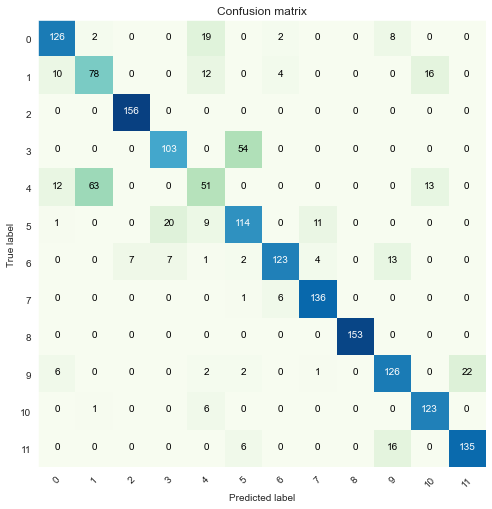

In [59]:
import seaborn as sns
sns.set_style("darkgrid")

plt.figure(figsize=(7,7))
plt.grid(False)

# call pre defined function
plot_confusion_matrix(cnf_matrix, classes=range(12))

In [60]:
from sklearn.metrics import classification_report

target_names = ["Class {}".format(i) for i in range(12)]
print(classification_report(y_true, y_pred, 
                            target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.81      0.80      0.81       157
     Class 1       0.54      0.65      0.59       120
     Class 2       0.96      1.00      0.98       156
     Class 3       0.79      0.66      0.72       157
     Class 4       0.51      0.37      0.43       139
     Class 5       0.64      0.74      0.68       155
     Class 6       0.91      0.78      0.84       157
     Class 7       0.89      0.95      0.92       143
     Class 8       1.00      1.00      1.00       153
     Class 9       0.77      0.79      0.78       159
    Class 10       0.81      0.95      0.87       130
    Class 11       0.86      0.86      0.86       157

    accuracy                           0.80      1783
   macro avg       0.79      0.80      0.79      1783
weighted avg       0.80      0.80      0.80      1783



### <span class="bg-warning">4.3 Random forest<span> 

In [61]:
# train our model using training data
rf = RandomForestClassifier(labelCol="labelIndex",featuresCol='X_vectors_pca', numTrees=10)
rfModel = rf.fit(train)
# test our model and make predictions using testing data
predictions = rfModel.transform(test)
predictions.select("prediction", "labelIndex").show(5)

+----------+----------+
|prediction|labelIndex|
+----------+----------+
|       0.0|       0.0|
|       0.0|       0.0|
|       1.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
+----------+----------+
only showing top 5 rows



In [62]:
# evaluate the performance of the classifier
evaluator = MulticlassClassificationEvaluator(labelCol="labelIndex",predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))
print("Accuracy = %g " % accuracy)

Test Error = 0.0902973
Accuracy = 0.909703 


In [63]:
evaluator = MulticlassClassificationEvaluator(labelCol="labelIndex",predictionCol="prediction", metricName='weightedPrecision')
precision = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - precision))
print("Precision = %g " % precision)

Test Error = 0.0790994
Precision = 0.920901 


In [64]:
y_true = predictions.select("labelIndex")
y_true = y_true.toPandas()

y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred, labels=range(12))

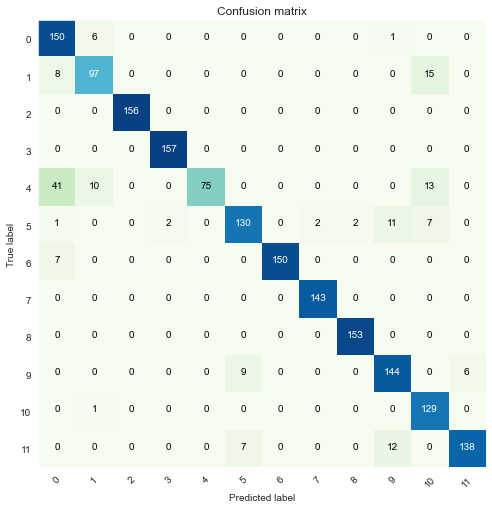

In [65]:
sns.set_style("darkgrid")

plt.figure(figsize=(7,7))
plt.grid(False)

# call pre defined function
plot_confusion_matrix(cnf_matrix, classes=range(12))

In [66]:
from sklearn.metrics import classification_report

target_names = ["Class {}".format(i) for i in range(12)]
print(classification_report(y_true, y_pred, 
                            target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.72      0.96      0.82       157
     Class 1       0.85      0.81      0.83       120
     Class 2       1.00      1.00      1.00       156
     Class 3       0.99      1.00      0.99       157
     Class 4       1.00      0.54      0.70       139
     Class 5       0.89      0.84      0.86       155
     Class 6       1.00      0.96      0.98       157
     Class 7       0.99      1.00      0.99       143
     Class 8       0.99      1.00      0.99       153
     Class 9       0.86      0.91      0.88       159
    Class 10       0.79      0.99      0.88       130
    Class 11       0.96      0.88      0.92       157

    accuracy                           0.91      1783
   macro avg       0.92      0.91      0.90      1783
weighted avg       0.92      0.91      0.91      1783

